In [ ]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-prime-tv-shows-and-movies/credits.csv
/kaggle/input/amazon-prime-tv-shows-and-movies/titles.csv


This dataset contains +9k unique titles on Amazon Prime with 15 columns containing their information, including:

* ID: The title ID on JustWatch.
* title: The name of the title.
* show type: TV show or movie.
* description: A brief description.
* release year: The release year.
* age certification: The age certification.
* runtime: The length of the episode (SHOW) or movie.
* genres: A list of genres.
* production countries: A list of countries that produced the title.
* seasons: Number of seasons if it's a SHOW.
* IMDB ID: The title ID on IMDB.
* IMDB Score: Score on IMDB.
* IMDB Votes: Votes on IMDB.
* TMDB Popularity: Popularity on TMDB.
* TMDB Score: Score on TMDB.

And over +124k credits of actors and directors on Amazon Prime titles with 5 columns containing their information:

person ID: The person ID on JustWatch.
* ID: The title ID on JustWatch.
* name: The actor or director's name.
* character name: The character name.
* role: ACTOR or DIRECTOR.


In [ ]:
import  matplotlib.pyplot as plt
import seaborn as sns

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    


In [ ]:
credit_df = pd.read_csv("../input/amazon-prime-tv-shows-and-movies/credits.csv")
title_df = pd.read_csv("../input/amazon-prime-tv-shows-and-movies/titles.csv")

### Explore Credits Data

In [ ]:
credit_df.sample(5)

,person_id,id,name,character,role
53431,138,ts1401,Takahiro Sakurai,Takashi Kamiyama,ACTOR
76325,322124,tm34638,Holly Illis,Sarah,ACTOR
53732,35347,tm117808,Jack Kehler,Denny,ACTOR
120391,1746925,tm991286,Daniela Bernal,NaN,DIRECTOR
63857,80934,tm138843,Sung-Hi Lee,Sun Yi,ACTOR


In [ ]:
credit_df.shape

(124235, 5)

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [ ]:
credit_df.isnull().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [ ]:
# replace null values with 'No Data'
credit_df['character'].replace(np.nan, 'No Data', inplace = True)

In [ ]:
credit_df.duplicated().sum()

56

### Explore Title Data

In [ ]:
title_df.sample(5) 

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
8235,tm979349,A Royal Christmas Engagement,MOVIE,"A Manhattan ad agency boss, John Holiday, entr...",2020,NaN,80,"['romance', 'family']",['US'],NaN,tt12110636,4.7,366.0,2.438,5.1
9508,tm1058483,The Land Between the Lakes,MOVIE,A newly promoted detective (Alan Wesley) tries...,2021,NaN,110,['animation'],[],NaN,tt14557056,3.9,16.0,NaN,NaN
6511,ts226008,Kashmir The Story,SHOW,An insight into the conflict-ridden region of ...,2018,NaN,22,['documentation'],['IN'],1.0,NaN,NaN,NaN,0.604,NaN
1049,tm94639,The Earthling,MOVIE,"Recently diagnosed with a terminal illness, a ...",1980,PG,97,"['action', 'drama']","['AU', 'US']",NaN,tt0080671,6.9,1615.0,2.952,6.7
5427,tm263723,Heartland,MOVIE,"A young Oklahoma artist, struggling with a rec...",2016,NaN,98,"['drama', 'romance', 'family']",['US'],NaN,tt3920890,6.1,624.0,4.799,5.5


In [ ]:
title_df.shape

(9871, 15)

In [ ]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [ ]:
title_df.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [ ]:
title_df = title_df.drop(columns = ['seasons', 'age_certification'])

In [ ]:
# impute values rest of the null columns
title_df['tmdb_score'] = title_df['tmdb_score'].fillna(title_df['tmdb_score'].mode()[0])
title_df['imdb_votes'] = title_df['imdb_votes'].fillna(title_df['imdb_votes'].mode()[0])
title_df['imdb_score'] = title_df['imdb_score'].fillna(title_df['imdb_score'].mode()[0])
title_df['tmdb_popularity'] = title_df['tmdb_popularity'].fillna(title_df['tmdb_popularity'].mode()[0])
title_df['imdb_id'].replace(np.nan, 'No Data',inplace  = True)
title_df['description'].replace(np.nan, 'No Data',inplace  = True)


In [ ]:
title_df['production_countries'] = title_df['production_countries'].str[2:4]
for i in range(len(title_df['production_countries'])):
    if title_df['production_countries'][i] == '':
        title_df['production_countries'][i] = 'Unknown'

In [ ]:
credit_df.sample(5)

,person_id,id,name,character,role
116489,1010996,tm1055634,Lauren Richards,No Data,ACTOR
34979,494505,tm21799,Christina Cardan,Helga,ACTOR
47468,128396,tm254942,Kovai Sarala,No Data,ACTOR
16266,13427,tm2802,Dan White,Engineer Jim Lockwood,ACTOR
72185,18459,tm158653,Skipp Sudduth,Tony,ACTOR


## EDA

<AxesSubplot:title={'center':'Highest release year'}, xlabel='release_year', ylabel='count'>

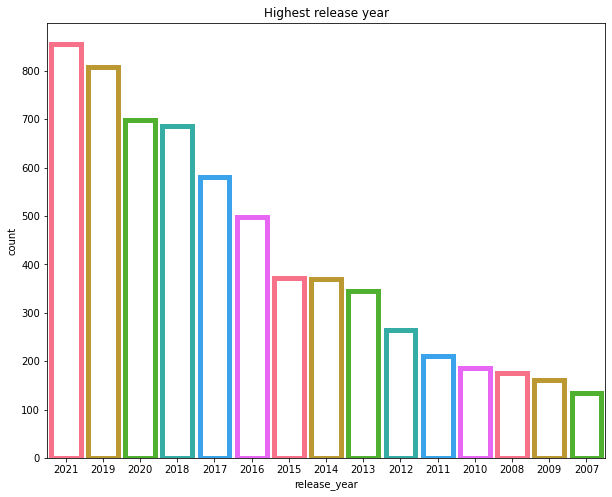

In [ ]:
#Top 15 years when maximum movies n TV shows were added
plt.figure(figsize = (10,8))
plt.title('Highest release year')
sns.countplot(x='release_year', data = title_df,order = title_df['release_year'].value_counts().index[:15], facecolor=(0,0,0,0),linewidth =5, edgecolor = sns.color_palette("husl"))

<AxesSubplot:title={'center':'Movie vs Show'}, xlabel='type', ylabel='count'>

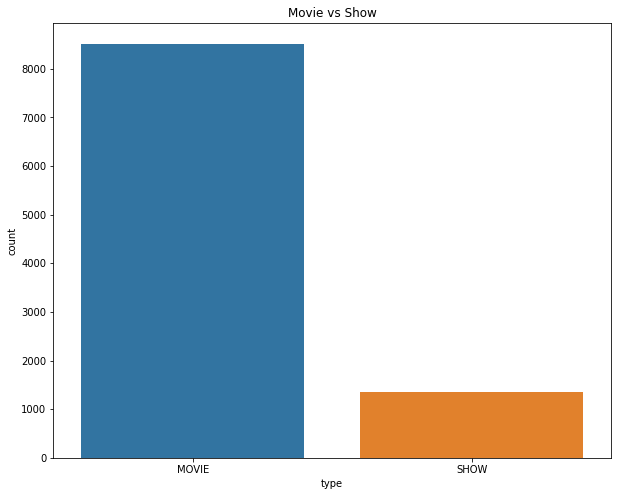

In [ ]:
#Top 15 years when maximum movies n TV shows were added
plt.figure(figsize = (10,8))
plt.title('Movie vs Show')
sns.countplot(x='type', data = title_df,order = title_df['type'].value_counts().index[:15] ,linewidth =5)

<AxesSubplot:title={'center':'Top Production Countries'}, xlabel='production_countries', ylabel='count'>

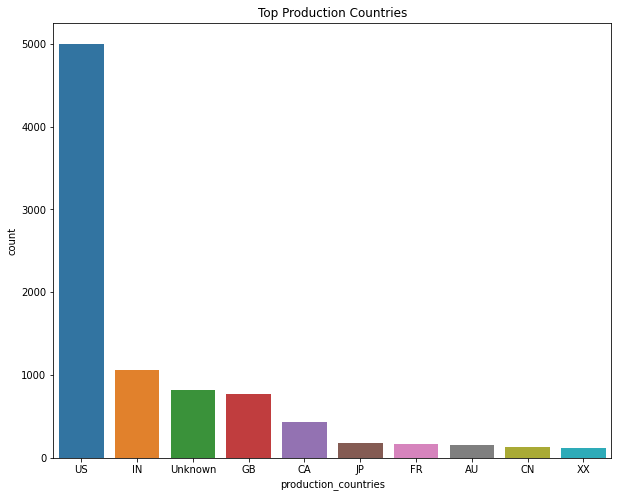

In [ ]:
#Top Production Countries in which movies and TV shows were addded
plt.figure(figsize = (10,8))
plt.title('Top Production Countries')
sns.countplot(x='production_countries', data = title_df,order = title_df['production_countries'].value_counts().index[:10] ,linewidth =5)

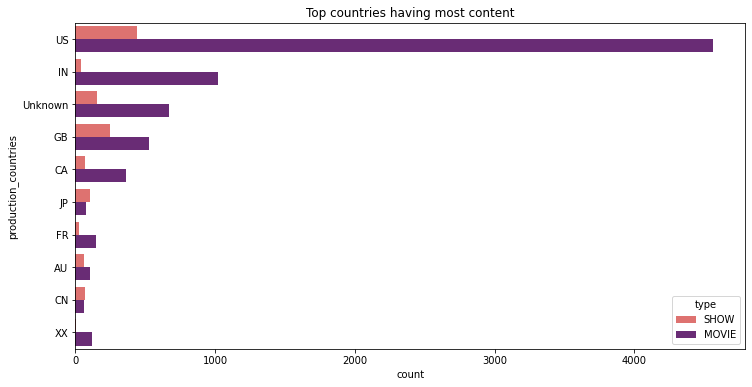

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = title_df,y = 'production_countries', order = title_df["production_countries"].value_counts().index[0:10],hue = 'type',palette = 'magma_r')
plt.title("Top countries having most content")
plt.show()
        

In [ ]:
# imdb = title_df[title_df["imdb_score"] > 8]
# tmdb = title_df[title_df["tmdb_score"] > 8]

# Popularity Based Recomender Engine

In [ ]:
new_df = title_df[['title','type','genres','release_year','imdb_score','imdb_votes']]

In [ ]:
new_df = new_df[new_df['imdb_votes']>500]

In [ ]:
new_df = new_df.sort_values(by = ['imdb_votes','imdb_score'], ascending = False)

In [ ]:
popular_movies = new_df[new_df['type'] == 'MOVIE'].head(50)

In [ ]:
popular_shows = new_df[new_df['type'] == 'SHOW'].head(50)

In [ ]:
popular_movies

,title,type,genres,release_year,imdb_score,imdb_votes
2220,Titanic,MOVIE,"['drama', 'romance']",1997,7.9,1133692.0
2230,The Usual Suspects,MOVIE,"['thriller', 'crime', 'drama']",1995,8.5,1059480.0
2237,Braveheart,MOVIE,"['drama', 'history', 'war']",1995,8.4,1016629.0
2229,The Sixth Sense,MOVIE,"['thriller', 'drama']",1999,8.2,967864.0
1814,The Terminator,MOVIE,"['thriller', 'action', 'scifi']",1984,8.1,841706.0
4102,Skyfall,MOVIE,"['thriller', 'action']",2012,7.8,684779.0
2824,District 9,MOVIE,"['scifi', 'thriller', 'action']",2009,7.9,670344.0
5293,Arrival,MOVIE,"['drama', 'scifi', 'thriller']",2016,7.9,669220.0
2228,Fargo,MOVIE,"['thriller', 'crime', 'drama']",1996,8.1,663221.0
2811,Shrek,MOVIE,"['fantasy', 'animation', 'comedy', 'family', '...",2001,7.9,659470.0


In [ ]:
popular_shows

,title,type,genres,release_year,imdb_score,imdb_votes
2810,Dexter,SHOW,"['drama', 'thriller', 'crime']",2006,8.7,711566.0
2807,How I Met Your Mother,SHOW,"['comedy', 'romance']",2005,8.3,661972.0
4573,Vikings,SHOW,"['action', 'drama', 'war', 'history', 'romance...",2013,8.5,508388.0
2808,House,SHOW,"['drama', 'comedy']",2004,8.7,448480.0
5287,Better Call Saul,SHOW,"['comedy', 'drama', 'crime']",2015,8.8,404920.0
4099,Suits,SHOW,"['drama', 'comedy']",2011,8.5,395600.0
5292,Mr. Robot,SHOW,"['crime', 'drama', 'thriller']",2015,8.6,373828.0
7426,The Boys,SHOW,"['scifi', 'action', 'crime', 'drama', 'comedy']",2019,8.7,362539.0
4100,American Horror Story,SHOW,"['scifi', 'drama', 'thriller', 'crime', 'horror']",2011,8.0,304893.0
2812,Community,SHOW,['comedy'],2009,8.5,252564.0
